#  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [ ]:
# load data
pretest_data = pd.read_csv('/content/Doctor Who? (pretest).csv')
actual_data = pd.read_csv('/content/Doctor Who? (actual).csv')

In [ ]:
def preprocess(data):
  # drop metadata
  data = data.drop(data.columns[:23], axis = 1)

  # convert data to numeric
  data = data.apply(pd.to_numeric, errors = 'ignore')

  # drop responses that failed attention check
  data = data[data['Attention Check'] == 7]

  # create dummies for categorical data
  data = pd.get_dummies(data, columns=['Condition'], prefix_sep=' ', dtype=int)

  data['Gender'].replace({
      1: 'Male',
      2: 'Female',
      3: 'Other',
      4: np.nan
  }, inplace = True)
  data = pd.get_dummies(data, columns=['Gender'], prefix_sep=' ', dtype=int)

  data['Race'].replace({
      1: 'American Indian Or Alaska Native',
      2: 'Asian',
      3: 'Black Or African American',
      4: 'Native Hawaiian Or Pacific Islander',
      5: 'White',
      6: 'Multiple Race Or Other',
      7: np.nan
  }, inplace = True)
  data = pd.get_dummies(data, columns=['Race'], prefix_sep=' ', dtype=int)

  data['Hispanic'].replace({
      1: 'Yes',
      2: 'No',
  }, inplace = True)
  data = pd.get_dummies(data, columns=['Hispanic'], prefix_sep=' ', dtype=int)

  data['Past Norovirus'].replace({
      1: 'Yes',
      2: 'No',
      3: np.nan
  }, inplace = True)
  data = pd.get_dummies(data, columns=['Past Norovirus'], prefix_sep=' ', dtype=int)

  # exclude nonresponses
  data['Income'].replace(7, np.nan, inplace = True)
  data['Age'].replace(7, np.nan, inplace = True)
  data['Political Ideology'].replace(6, np.nan, inplace = True)

  return data

In [ ]:
pretest_data = preprocess(pretest_data)
actual_data = preprocess(actual_data)

In [ ]:
def get_stats(data, conditions, variable):
  stats = {}
  for condition in conditions:
      stats[condition] = data[data[condition] == 1][variable].describe().loc[['mean', 'std', '50%']]
  stats = pd.DataFrame(stats)
  print(stats)

In [ ]:
def plot_counts(data, conditions, variable):
    fig, axes = plt.subplots(1, len(conditions), figsize=(18, 6), sharey = True)
    for i, condition in enumerate(conditions):
        subset = data[data[condition] == 1]
        axes[i].hist(subset[variable], bins=7)
        axes[i].set_title(condition)
        axes[i].set_xticks(subset[variable].unique())
        axes[i].set_xticklabels(subset[variable].unique(), rotation=45)

    axes[0].set_ylabel('Count')
    if (variable == 'Likelihood Vaccine'):
      plt.suptitle('Likelihood to Get Vaccine', fontsize=16)
    elif (variable == 'Likelihood More Info'):
      plt.suptitle('Likelihood to Seek More Info', fontsize=16)
    elif (variable == "Likelihood Advise Others"):
      plt.suptitle('Likelihood to Advise Others', fontsize=16)
    elif (variable == "Likelihood Hang Up"):
      plt.suptitle('Likelihood to Hang Up', fontsize=16)
    else: plt.suptitle(variable, fontsize=16)
    plt.show()

In [ ]:
def perform_regression(data, independent_variables, variable):
    X = data[independent_variables]
    X = sm.add_constant(X)
    y = data[variable]

    result = sm.OLS(y, X, 'drop').fit()
    print(result.summary())

# **PRETEST**:

In [ ]:
pretest_conditions = ['Condition Human Female', 'Condition Human Male']

## **BASIC STATS:**

### Speaker ID ((1 = Human, 7 = AI):

      Condition Human Female  Condition Human Male
mean                5.791667              5.500000
std                 1.587428              1.555635
50%                 6.500000              5.500000


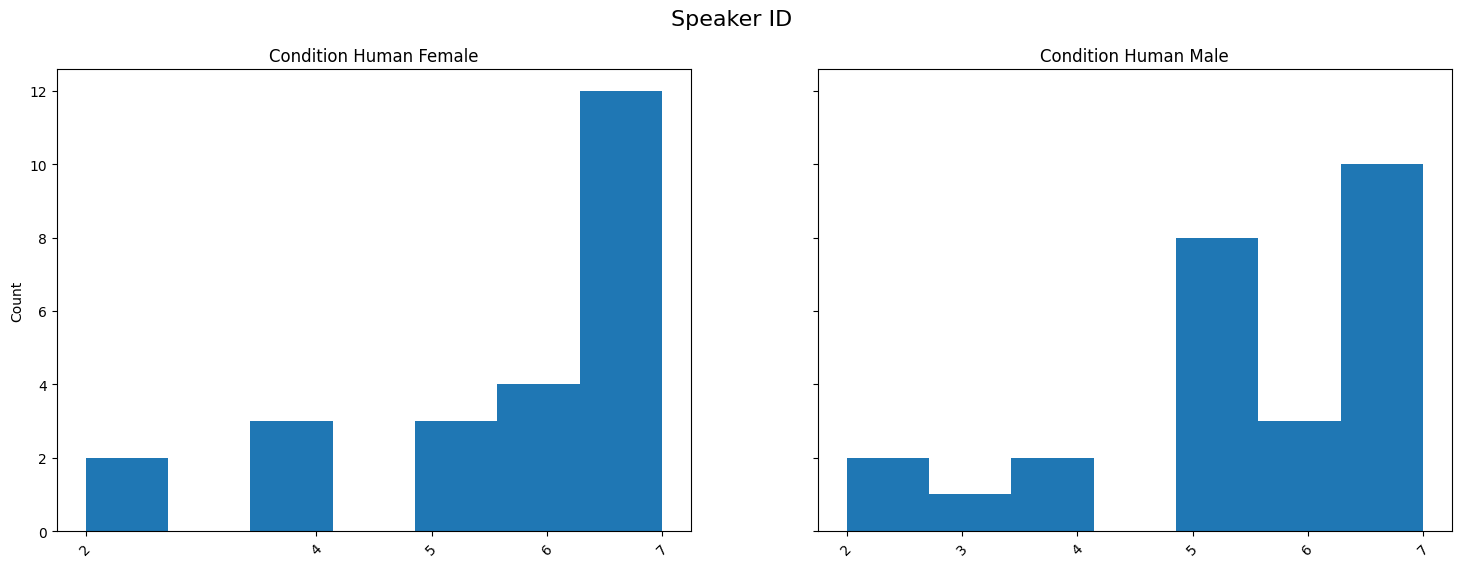

In [ ]:
get_stats(pretest_data, pretest_conditions, 'Speaker ID')
plot_counts(pretest_data, pretest_conditions, 'Speaker ID')

### Overall Satisfaction:

      Condition Human Female  Condition Human Male
mean                5.708333              5.423077
std                 1.267629              1.419100
50%                 6.000000              6.000000


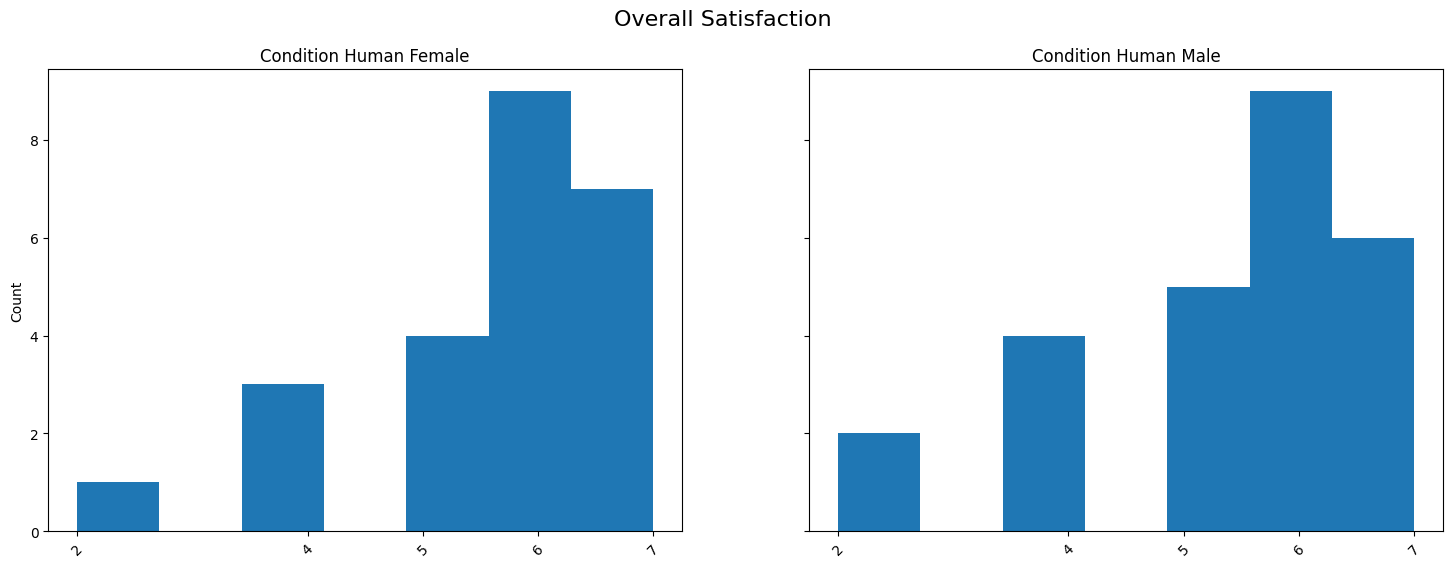

In [ ]:
get_stats(pretest_data, pretest_conditions, 'Overall Satisfaction')
plot_counts(pretest_data, pretest_conditions, 'Overall Satisfaction')

## **DEPENDENT VARIABLE BASIC REGRESSION (const = Condition Human Male):**

In [ ]:
pretest_conditions = ['Condition Human Female'] # baseline is condition human male

### Speaker ID ((1 = Human, 7 = AI):

In [ ]:
perform_regression(pretest_data, pretest_conditions, 'Speaker ID')

                            OLS Regression Results                            
Dep. Variable:             Speaker ID   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4302
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.515
Time:                        20:38:47   Log-Likelihood:                -92.510
No. Observations:                  50   AIC:                             189.0
Df Residuals:                      48   BIC:                             192.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Overall Satisfaction:

In [ ]:
perform_regression(pretest_data, pretest_conditions, 'Overall Satisfaction')

                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                 -0.009
Method:                   Least Squares   F-statistic:                    0.5583
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):              0.459
Time:                          20:38:47   Log-Likelihood:                -84.881
No. Observations:                    50   AIC:                             173.8
Df Residuals:                        48   BIC:                             177.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

## **DEPENDENT VARIABLE BASIC REGRESSION W/ CONTROLS (const = Condition Human Male):**

In [ ]:
controls = ['Income', 'Age','Gender Female', # baseline is Gender Male
'Race Black Or African American', 'Race Multiple Race Or Other', 'Race Asian', # baseline is White
'Hispanic Yes', # baseline is Hispanic No
'Vaccine Attitude', 'Last Vaccine', 'Political Ideology',
'Past Norovirus Yes', # baseline is Past Norovirus No
'AI Experience', 'Voice AI Experience']

### Speaker ID ((1 = Human, 7 = AI):

In [ ]:
perform_regression(pretest_data, pretest_conditions + controls, 'Speaker ID')

                            OLS Regression Results                            
Dep. Variable:             Speaker ID   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.062
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.422
Time:                        20:38:47   Log-Likelihood:                -82.097
No. Observations:                  49   AIC:                             194.2
Df Residuals:                      34   BIC:                             222.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Overall Satisfaction:

In [ ]:
perform_regression(pretest_data, pretest_conditions + controls, 'Overall Satisfaction')

                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.470
Model:                              OLS   Adj. R-squared:                  0.252
Method:                   Least Squares   F-statistic:                     2.155
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):             0.0338
Time:                          20:38:47   Log-Likelihood:                -68.313
No. Observations:                    49   AIC:                             166.6
Df Residuals:                        34   BIC:                             195.0
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

# **ACTUAL**:

In [ ]:
actual_conditions = ['Condition Female Human', 'Condition Male Human', 'Condition Female AI', 'Condition Male AI']

## **BASIC STATS:**

### Likelihood to Seek More Info:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                4.575472              4.869159             4.761468   
std                 1.961283              1.759525             1.890028   
50%                 5.000000              5.000000             5.000000   

      Condition Male AI  
mean           5.045045  
std            1.790822  
50%            6.000000  


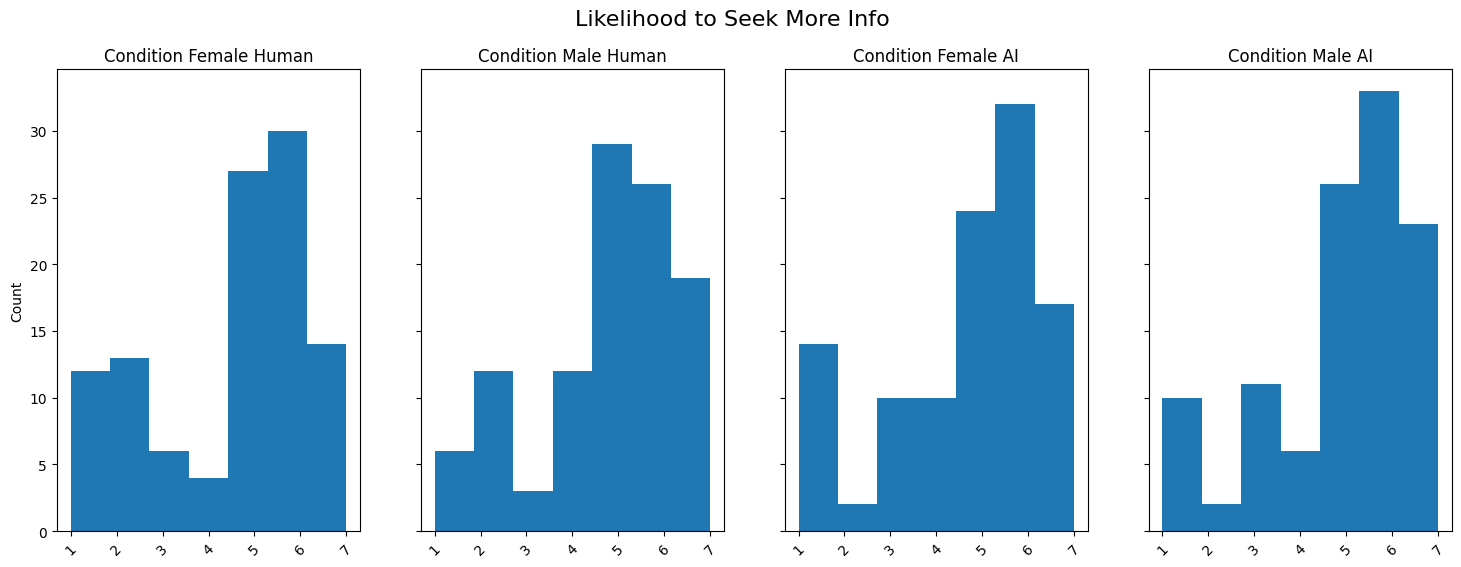

In [ ]:
get_stats(actual_data, actual_conditions, 'Likelihood More Info')
plot_counts(actual_data, actual_conditions, 'Likelihood More Info')

### Likelihood to Get Vaccine:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                4.037736              4.345794             4.275229   
std                 1.799071              1.888909             1.990122   
50%                 4.000000              5.000000             5.000000   

      Condition Male AI  
mean           4.369369  
std            1.930275  
50%            5.000000  


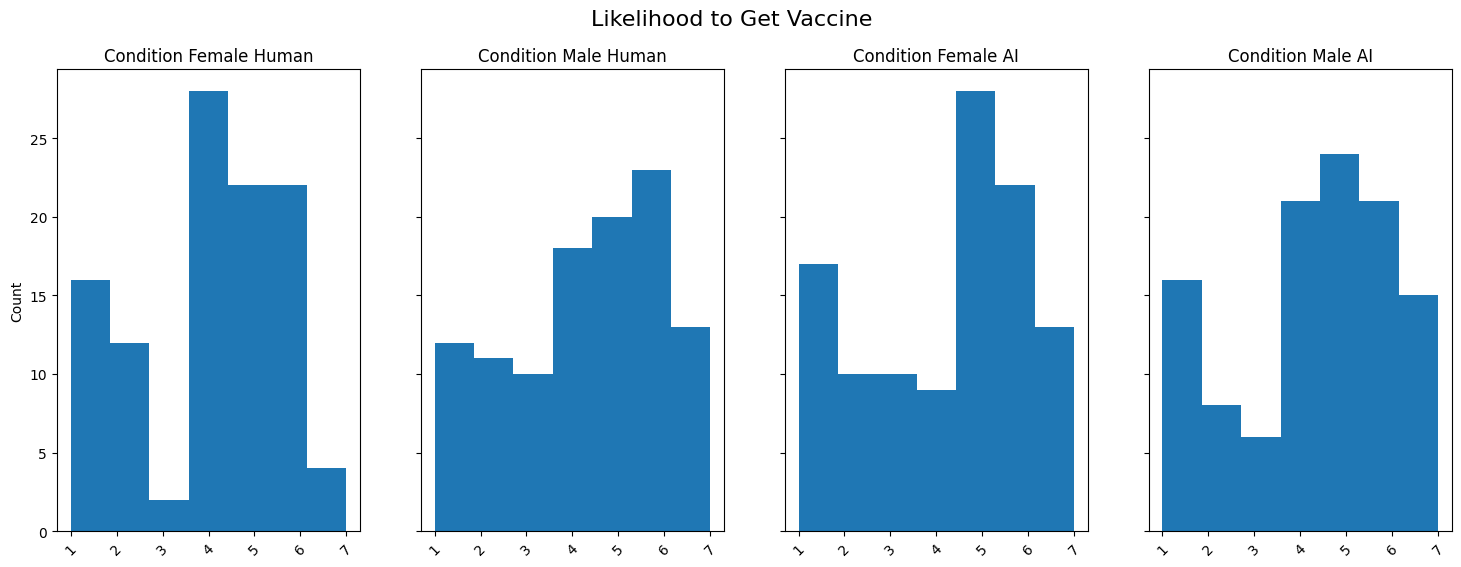

In [ ]:
get_stats(actual_data, actual_conditions, 'Likelihood Vaccine')
plot_counts(actual_data, actual_conditions, 'Likelihood Vaccine')

### Likelihood to Advise Others to Get Vaccine:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                3.990566              4.046729             4.211009   
std                 1.879692              1.875277             1.900650   
50%                 4.000000              4.000000             4.000000   

      Condition Male AI  
mean           4.207207  
std            1.916992  
50%            4.000000  


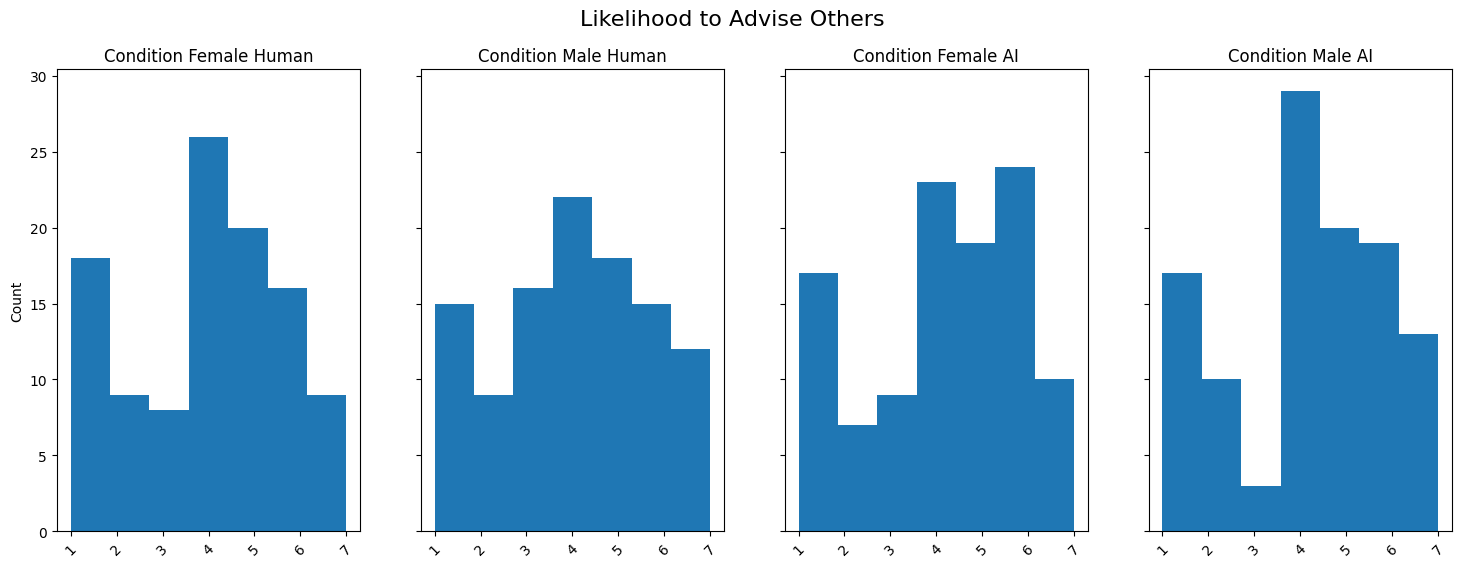

In [ ]:
get_stats(actual_data, actual_conditions, 'Likelihood Advise Others')
plot_counts(actual_data, actual_conditions, 'Likelihood Advise Others')

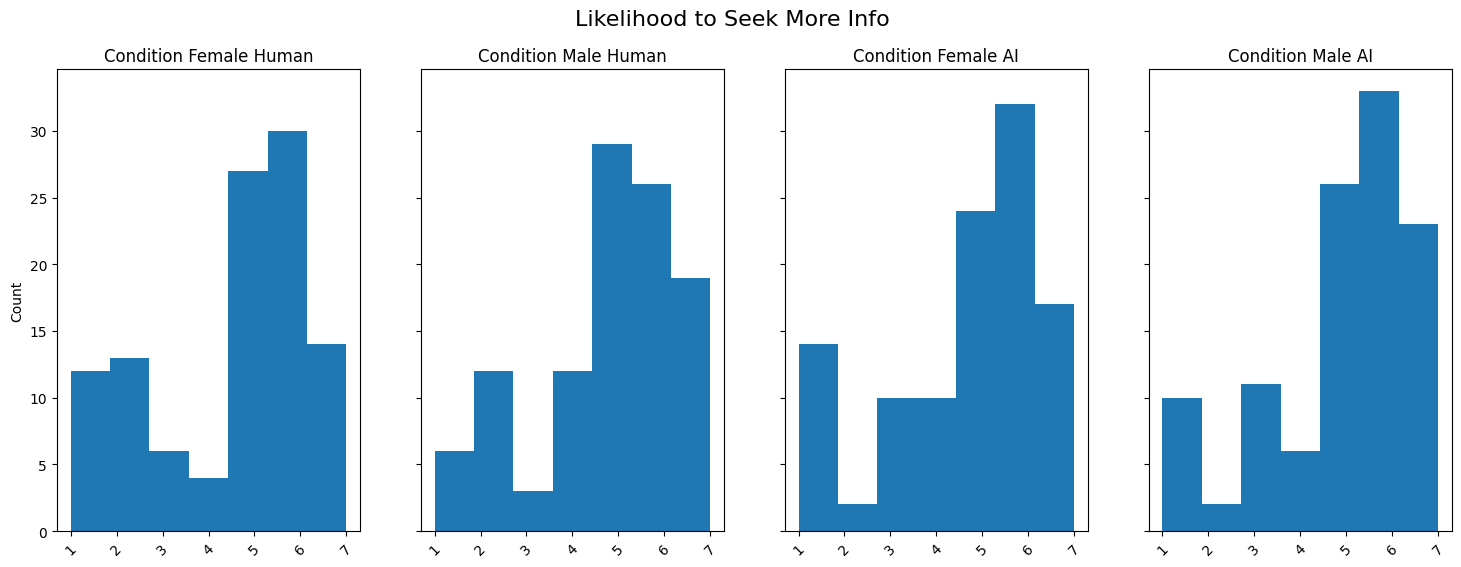

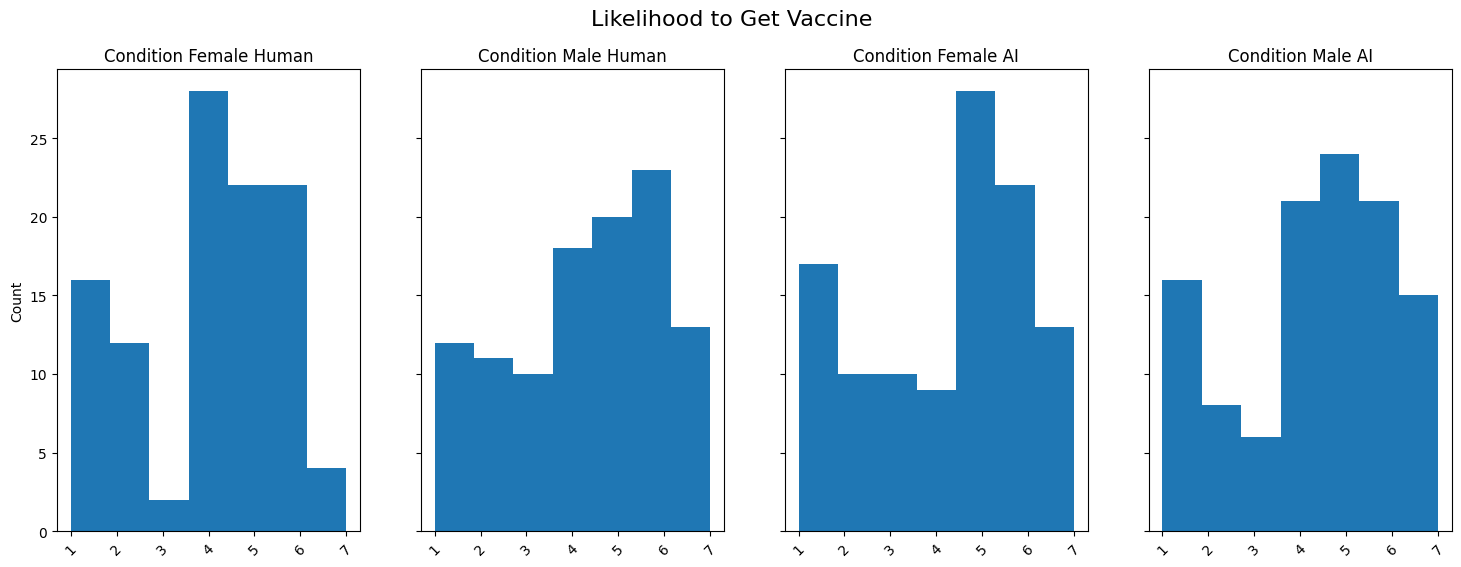

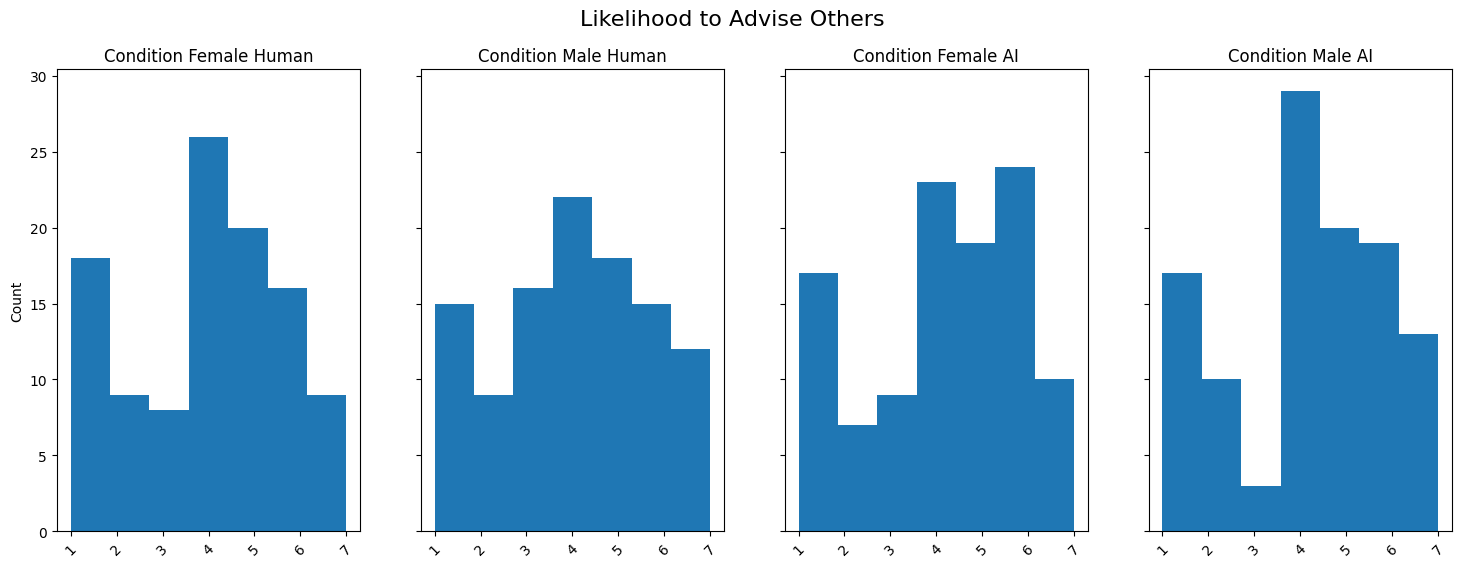

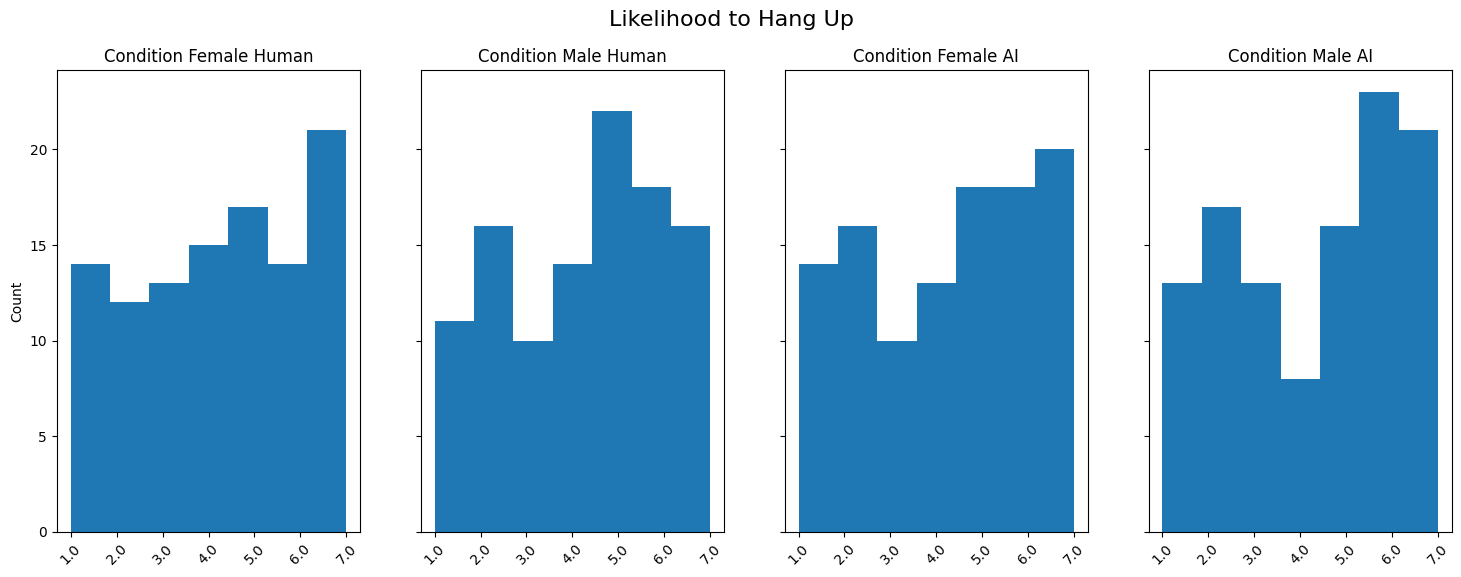

In [ ]:
plot_counts(actual_data, actual_conditions, 'Likelihood More Info')
plot_counts(actual_data, actual_conditions, 'Likelihood Vaccine')
plot_counts(actual_data, actual_conditions, 'Likelihood Advise Others')
plot_counts(actual_data, actual_conditions, 'Likelihood Hang Up')

### Clarity Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.990566              5.990654             5.908257   
std                 1.108369              1.209205             1.280490   
50%                 6.000000              6.000000             6.000000   

      Condition Male AI  
mean           6.153153  
std            1.054843  
50%            6.000000  


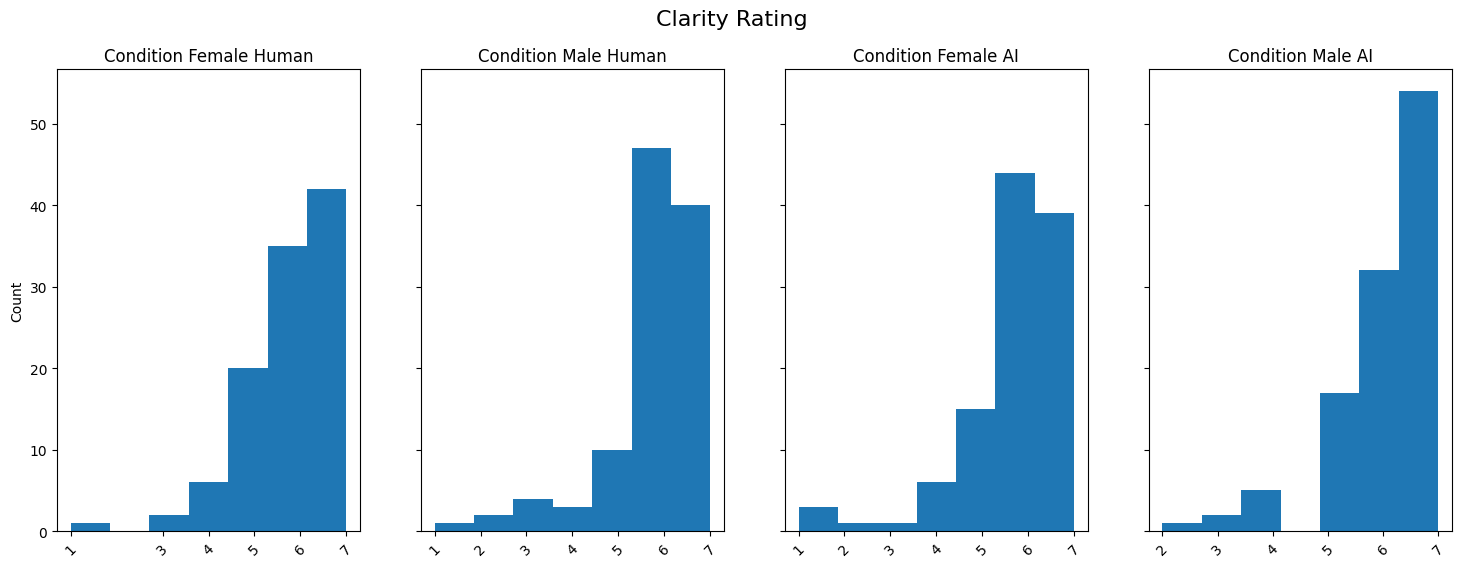

In [ ]:
get_stats(actual_data, actual_conditions, 'Clarity Rating')
plot_counts(actual_data, actual_conditions, 'Clarity Rating')

### Efficiency Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.500000              5.719626             5.651376   
std                 1.339865              1.203724             1.410123   
50%                 6.000000              6.000000             6.000000   

      Condition Male AI  
mean           5.774775  
std            1.248160  
50%            6.000000  


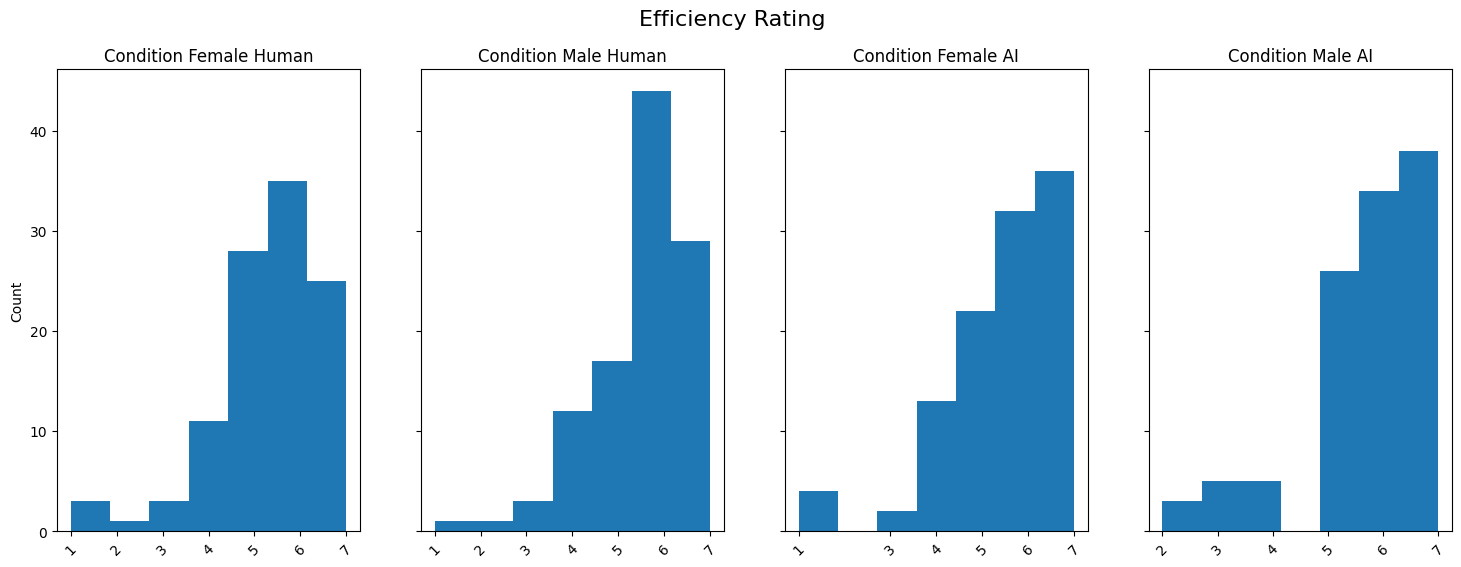

In [ ]:
get_stats(actual_data, actual_conditions, 'Efficiency Rating')
plot_counts(actual_data, actual_conditions, 'Efficiency Rating')

### Professionalism Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                6.075472              6.102804             5.935780   
std                 1.152208              1.235746             1.314275   
50%                 6.000000              6.000000             6.000000   

      Condition Male AI  
mean           6.180180  
std            1.071941  
50%            7.000000  


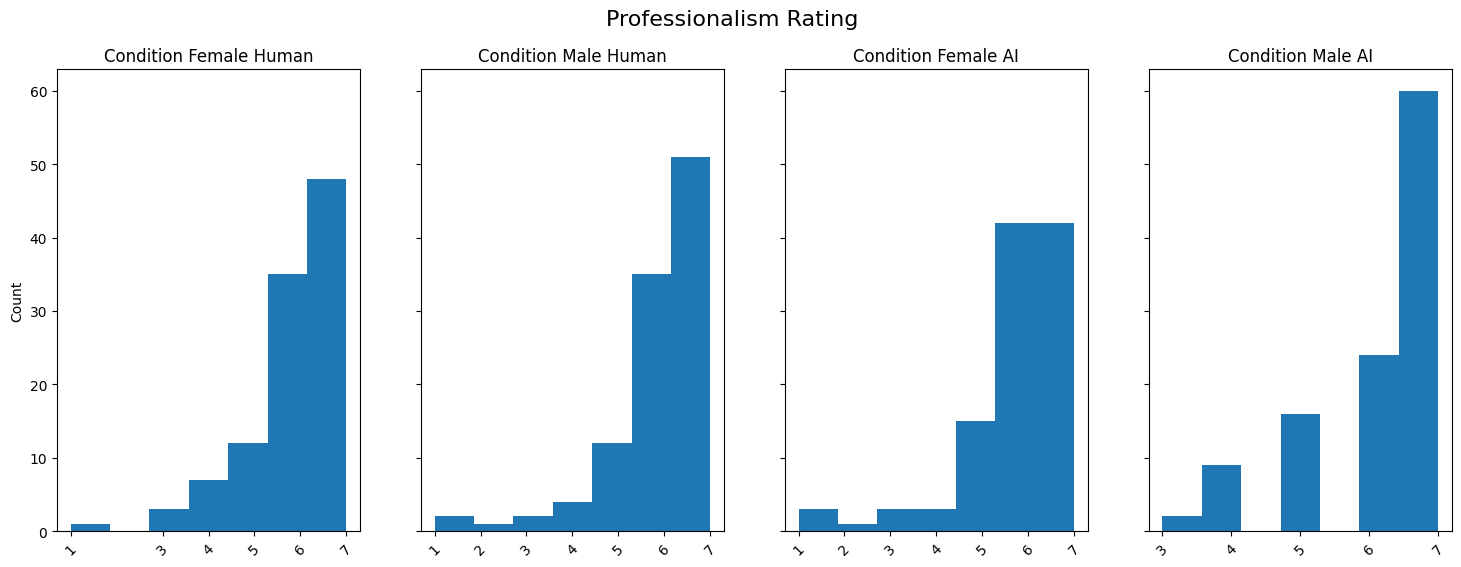

In [ ]:
get_stats(actual_data, actual_conditions, 'Professionalism Rating')
plot_counts(actual_data, actual_conditions, 'Professionalism Rating')

### Specificity Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.603774              5.672897             5.642202   
std                 1.262494              1.234532             1.280357   
50%                 6.000000              6.000000             6.000000   

      Condition Male AI  
mean           5.801802  
std            1.197116  
50%            6.000000  


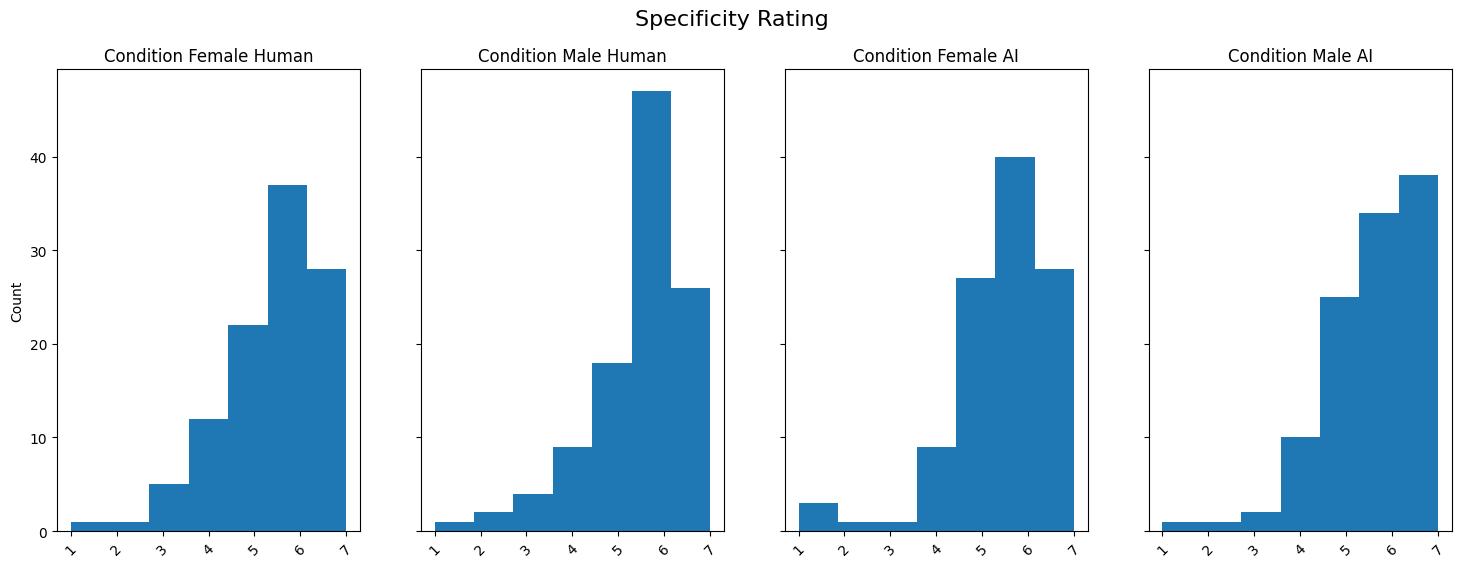

In [ ]:
get_stats(actual_data, actual_conditions, 'Specificity Rating')
plot_counts(actual_data, actual_conditions, 'Specificity Rating')

### Expressiveness Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                4.849057              4.831776             4.899083   
std                 1.510550              1.639639             1.615578   
50%                 5.000000              5.000000             5.000000   

      Condition Male AI  
mean           4.819820  
std            1.647026  
50%            5.000000  


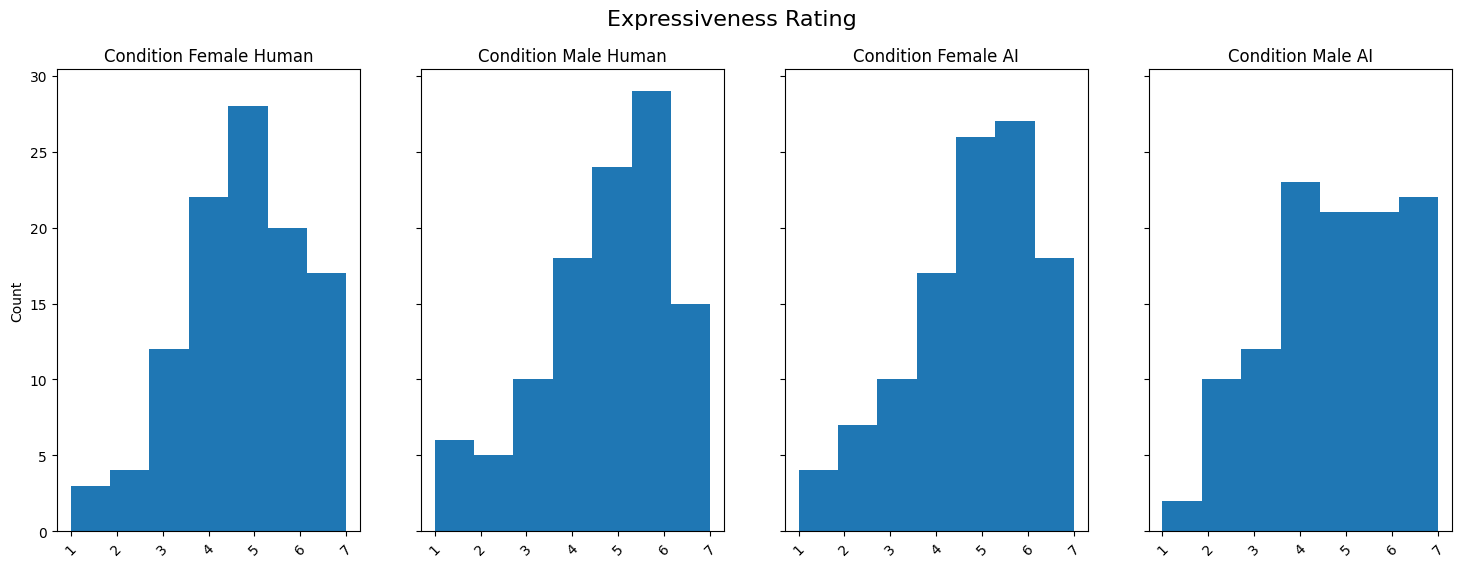

In [ ]:
get_stats(actual_data, actual_conditions, 'Expressiveness Rating')
plot_counts(actual_data, actual_conditions, 'Expressiveness Rating')

### Friendliness Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.160377              4.794393             5.201835   
std                 1.212135              1.564574             1.419310   
50%                 5.000000              5.000000             6.000000   

      Condition Male AI  
mean           4.972973  
std            1.534213  
50%            5.000000  


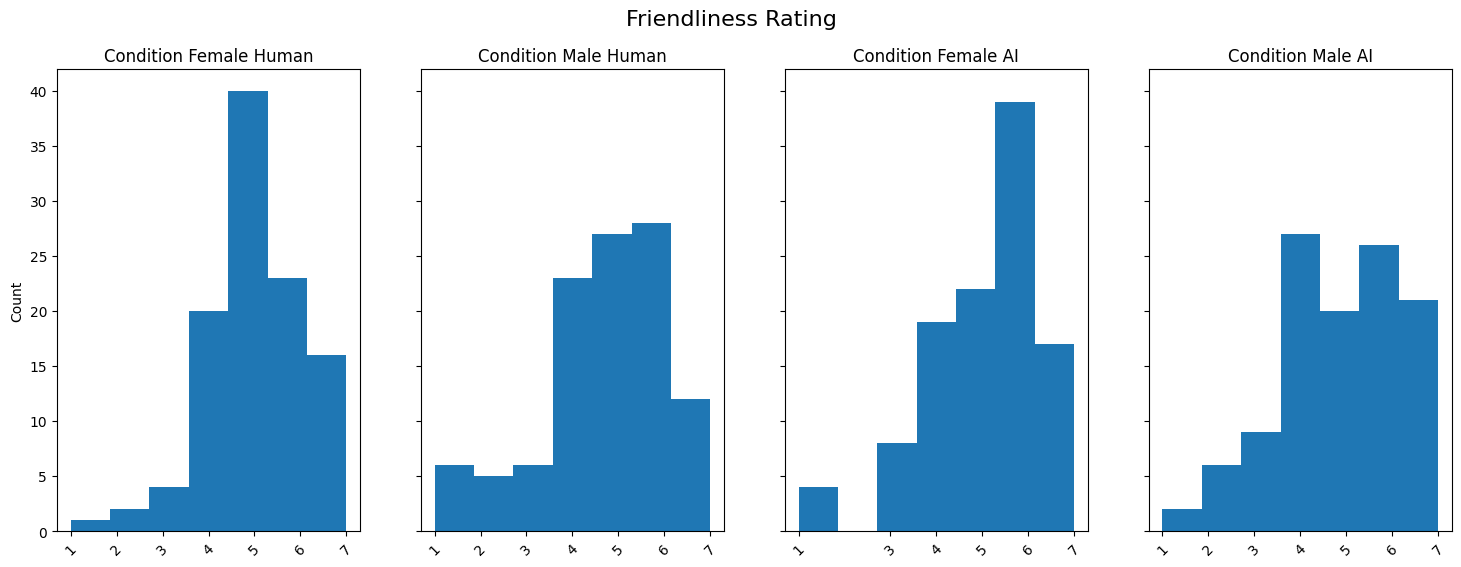

In [ ]:
get_stats(actual_data, actual_conditions, 'Friendliness Rating')
plot_counts(actual_data, actual_conditions, 'Friendliness Rating')

### Genuineness Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.056604              4.971963             5.055046   
std                 1.566496              1.616296             1.514344   
50%                 5.000000              5.000000             5.000000   

      Condition Male AI  
mean           5.153153  
std            1.602261  
50%            5.000000  


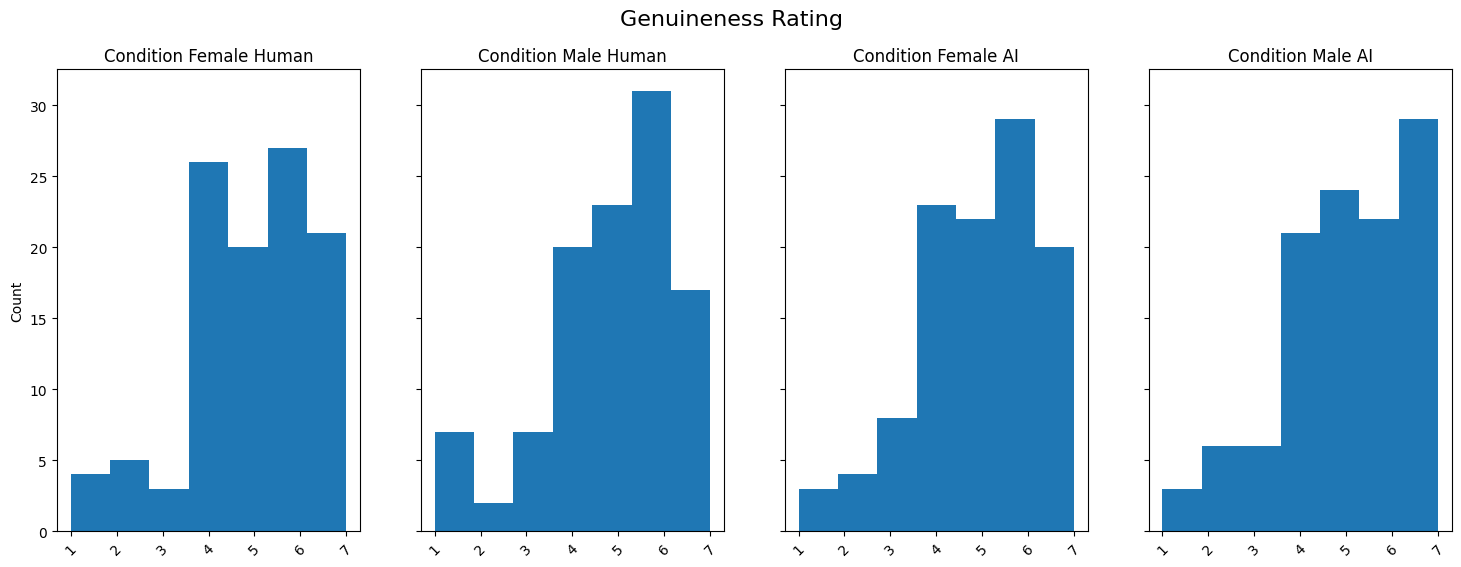

In [ ]:
get_stats(actual_data, actual_conditions, 'Genuineness Rating')
plot_counts(actual_data, actual_conditions, 'Genuineness Rating')

### Trustworthiness Rating:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                4.971698              5.224299             5.036697   
std                 1.545855              1.361938             1.496456   
50%                 5.000000              5.000000             5.000000   

      Condition Male AI  
mean           5.063063  
std            1.619648  
50%            5.000000  


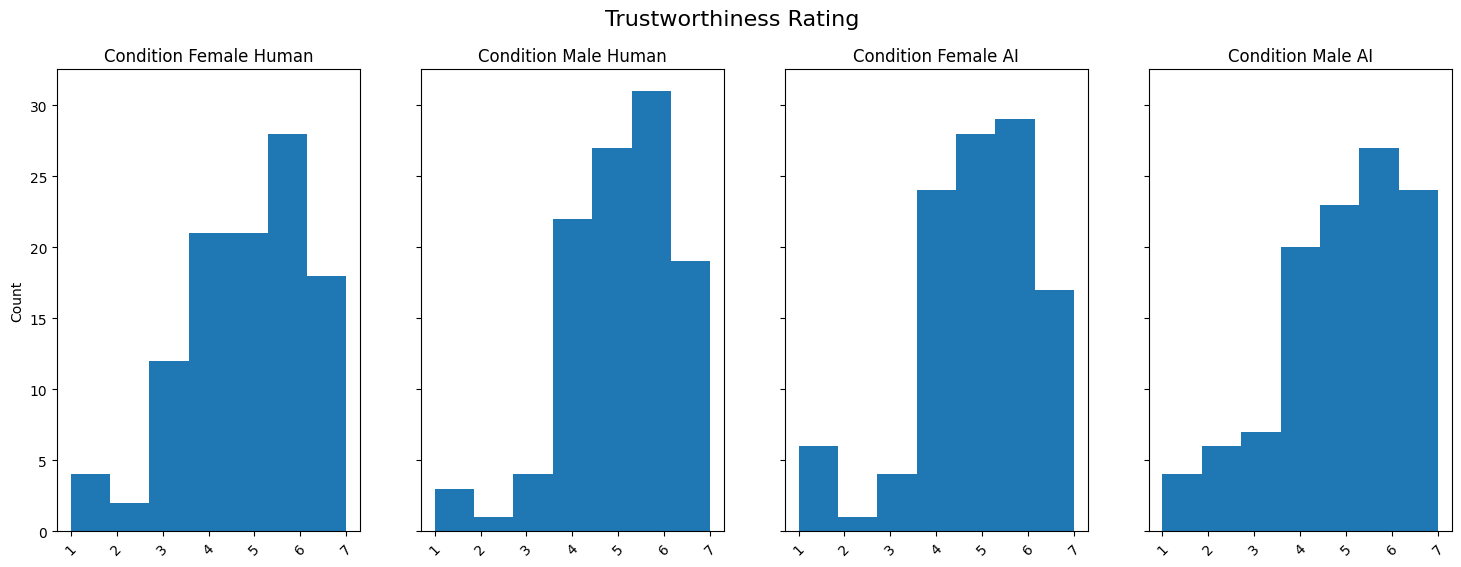

In [ ]:
get_stats(actual_data, actual_conditions, 'Trustworthiness Rating')
plot_counts(actual_data, actual_conditions, 'Trustworthiness Rating')

### Overall Satisfaction:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                5.452830              5.467290             5.348624   
std                 1.353177              1.341062             1.535844   
50%                 6.000000              6.000000             6.000000   

      Condition Male AI  
mean           5.558559  
std            1.373017  
50%            6.000000  


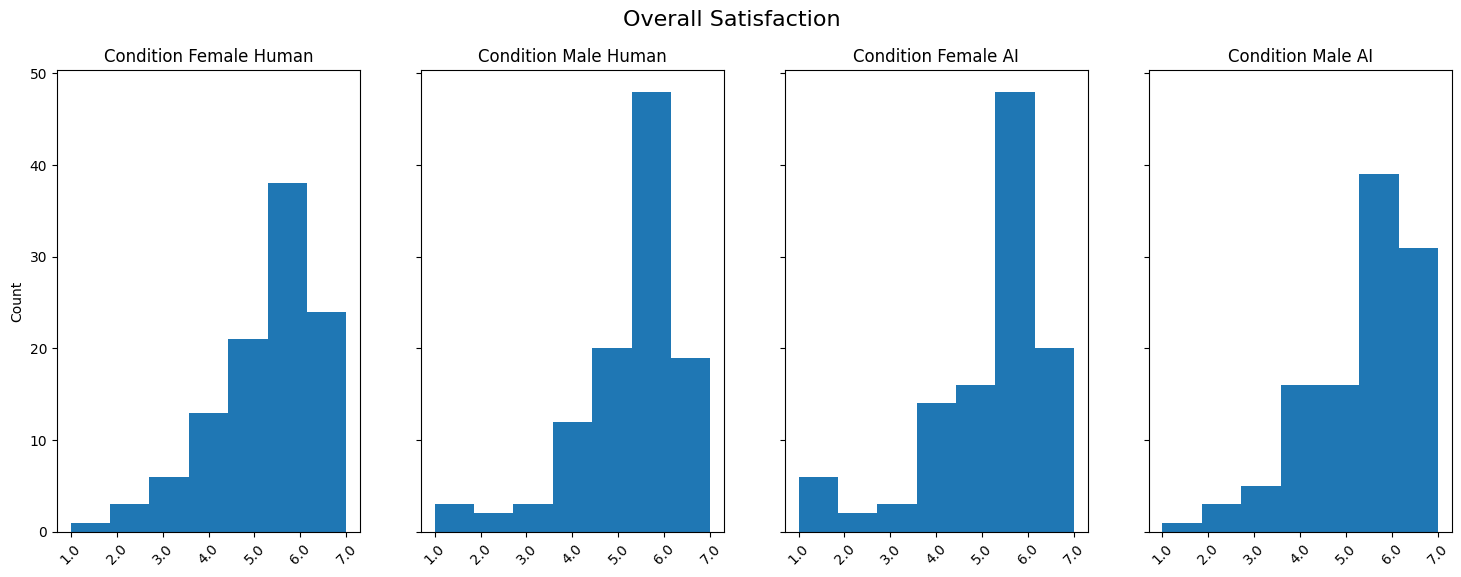

In [ ]:
get_stats(actual_data, actual_conditions, 'Overall Satisfaction')
plot_counts(actual_data, actual_conditions, 'Overall Satisfaction')

### Hang Up Likelihood:

      Condition Female Human  Condition Male Human  Condition Female AI  \
mean                4.273585              4.289720             4.275229   
std                 2.049544              1.947467             2.067704   
50%                 4.000000              5.000000             5.000000   

      Condition Male AI  
mean           4.351351  
std            2.091753  
50%            5.000000  


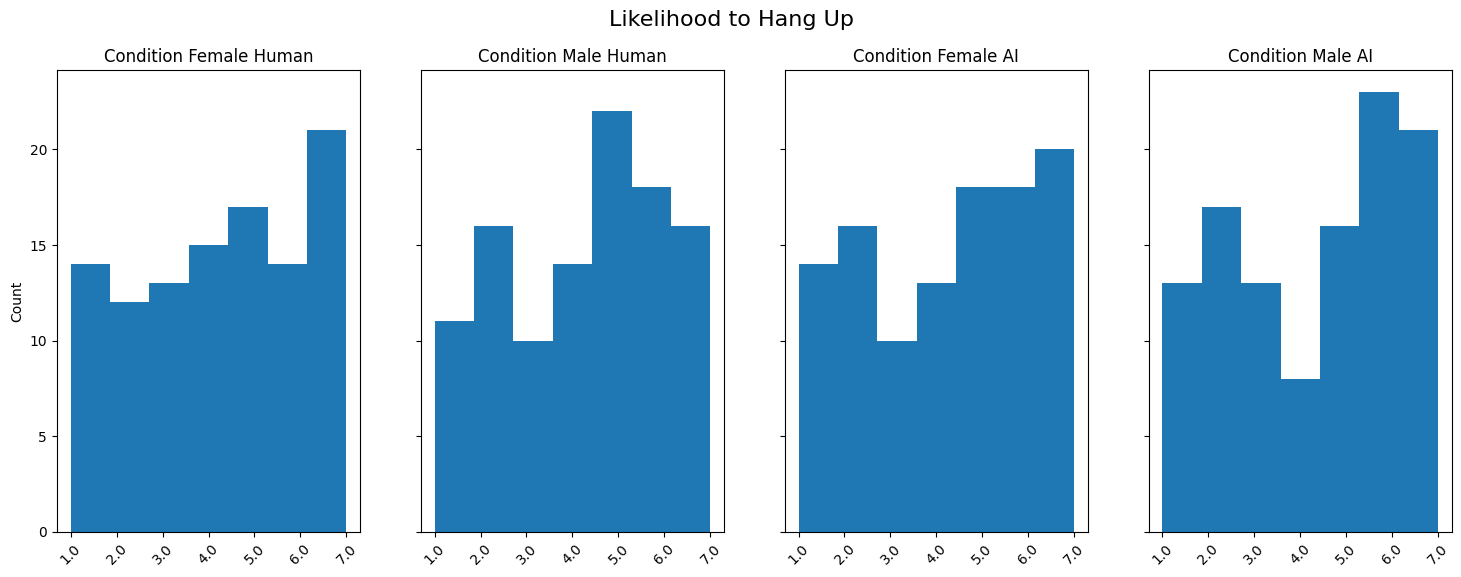

In [ ]:
get_stats(actual_data, actual_conditions, 'Likelihood Hang Up')
plot_counts(actual_data, actual_conditions, 'Likelihood Hang Up')

## **DEPENDENT VARIABLE BASIC REGRESSION (const = Condition Male Human):**

In [ ]:
actual_conditions = ['Condition Male AI', 'Condition Female Human', 'Condition Female AI']

### Likelihood Hang Up

In [ ]:
perform_regression(actual_data, actual_conditions, 'Likelihood Hang Up')

                            OLS Regression Results                            
Dep. Variable:     Likelihood Hang Up   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.03547
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.991
Time:                        20:39:00   Log-Likelihood:                -921.20
No. Observations:                 433   AIC:                             1850.
Df Residuals:                     429   BIC:                             1867.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

### Likelihood to Seek More Info:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Likelihood More Info')

                             OLS Regression Results                             
Dep. Variable:     Likelihood More Info   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.223
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):              0.301
Time:                          20:39:00   Log-Likelihood:                -879.12
No. Observations:                   433   AIC:                             1766.
Df Residuals:                       429   BIC:                             1783.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

### Likelihood to Get Vaccine:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Likelihood Vaccine')

                            OLS Regression Results                            
Dep. Variable:     Likelihood Vaccine   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6781
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.566
Time:                        20:39:00   Log-Likelihood:                -891.29
No. Observations:                 433   AIC:                             1791.
Df Residuals:                     429   BIC:                             1807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

### Likelihood to Advise Others to Get Vaccine:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Likelihood Advise Others')

                               OLS Regression Results                               
Dep. Variable:     Likelihood Advise Others   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                 -0.004
Method:                       Least Squares   F-statistic:                    0.3801
Date:                      Wed, 07 Aug 2024   Prob (F-statistic):              0.767
Time:                              20:39:00   Log-Likelihood:                -888.83
No. Observations:                       433   AIC:                             1786.
Df Residuals:                           429   BIC:                             1802.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Clarity Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Clarity Rating')

                            OLS Regression Results                            
Dep. Variable:         Clarity Rating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8534
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.465
Time:                        20:39:00   Log-Likelihood:                -678.97
No. Observations:                 433   AIC:                             1366.
Df Residuals:                     429   BIC:                             1382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Efficiency Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Efficiency Rating')

                            OLS Regression Results                            
Dep. Variable:      Efficiency Rating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8956
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.443
Time:                        20:39:00   Log-Likelihood:                -726.95
No. Observations:                 433   AIC:                             1462.
Df Residuals:                     429   BIC:                             1478.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Professionalism Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Professionalism Rating')

                              OLS Regression Results                              
Dep. Variable:     Professionalism Rating   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7969
Date:                    Wed, 07 Aug 2024   Prob (F-statistic):              0.496
Time:                            20:39:00   Log-Likelihood:                -690.09
No. Observations:                     433   AIC:                             1388.
Df Residuals:                         429   BIC:                             1404.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Specificity Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Specificity Rating')

                            OLS Regression Results                            
Dep. Variable:     Specificity Rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5222
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.667
Time:                        20:39:00   Log-Likelihood:                -706.83
No. Observations:                 433   AIC:                             1422.
Df Residuals:                     429   BIC:                             1438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Expressiveness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Expressiveness Rating')

                              OLS Regression Results                             
Dep. Variable:     Expressiveness Rating   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.007
Method:                    Least Squares   F-statistic:                   0.05168
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):              0.984
Time:                           20:39:00   Log-Likelihood:                -817.20
No. Observations:                    433   AIC:                             1642.
Df Residuals:                        429   BIC:                             1659.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Friendliness Rating:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
perform_regression(actual_data, actual_conditions, 'Friendliness Rating') # Condition Female AI is SS

                             OLS Regression Results                            
Dep. Variable:     Friendliness Rating   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     1.818
Date:                 Wed, 07 Aug 2024   Prob (F-statistic):              0.143
Time:                         20:39:00   Log-Likelihood:                -770.44
No. Observations:                  433   AIC:                             1549.
Df Residuals:                      429   BIC:                             1565.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

### Genuineness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Genuineness Rating')

                            OLS Regression Results                            
Dep. Variable:     Genuineness Rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2413
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.868
Time:                        20:39:00   Log-Likelihood:                -809.18
No. Observations:                 433   AIC:                             1626.
Df Residuals:                     429   BIC:                             1643.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

### Trustworthiness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Trustworthiness Rating')

                              OLS Regression Results                              
Dep. Variable:     Trustworthiness Rating   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.5398
Date:                    Wed, 07 Aug 2024   Prob (F-statistic):              0.655
Time:                            20:39:00   Log-Likelihood:                -790.79
No. Observations:                     433   AIC:                             1590.
Df Residuals:                         429   BIC:                             1606.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Overall Satisfaction:

In [ ]:
perform_regression(actual_data, actual_conditions, 'Overall Satisfaction')

                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic:                    0.4126
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):              0.744
Time:                          20:39:00   Log-Likelihood:                -759.16
No. Observations:                   433   AIC:                             1526.
Df Residuals:                       429   BIC:                             1543.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

## **DEPENDENT VARIABLE BASIC REGRESSION W/ CONTROLS (const = Condition Male Human):**

In [ ]:
actual_conditions = ['Condition Male AI', 'Condition Female Human', 'Condition Female AI']

In [ ]:
controls = ['Income', # 'Age',
# 'Race Black Or African American', 'Race Multiple Race Or Other', 'Race Asian', # baseline is White
# 'Hispanic Yes', # baseline is Hispanic No
'Vaccine Attitude', 'Last Vaccine', 'Political Ideology',
# 'Past Norovirus Yes', # baseline is Past Norovirus No
'AI Experience', 'Voice AI Experience'
            ]

### Likelihood to Seek More Info:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Likelihood More Info') # Race Black or African American, Vaccine Attitude, Last Vaccine, Voice AI Experience are SS

                             OLS Regression Results                             
Dep. Variable:     Likelihood More Info   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.211
Method:                   Least Squares   F-statistic:                     13.57
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):           3.95e-19
Time:                          20:39:00   Log-Likelihood:                -805.93
No. Observations:                   423   AIC:                             1632.
Df Residuals:                       413   BIC:                             1672.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

### Likelihood to Get Vaccine:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Likelihood Vaccine') # Race Black or African American, Vaccine Attitude, Last Vaccine, and Voice AI Experience are SS

                            OLS Regression Results                            
Dep. Variable:     Likelihood Vaccine   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     37.90
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           7.22e-49
Time:                        20:39:00   Log-Likelihood:                -746.22
No. Observations:                 423   AIC:                             1512.
Df Residuals:                     413   BIC:                             1553.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Likelihood to Advise Others to Get Vaccine:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Likelihood Advise Others') # Vaccine Attitude, Last Vaccine, and Voice AI Experience are SS

                               OLS Regression Results                               
Dep. Variable:     Likelihood Advise Others   R-squared:                       0.381
Model:                                  OLS   Adj. R-squared:                  0.368
Method:                       Least Squares   F-statistic:                     28.27
Date:                      Wed, 07 Aug 2024   Prob (F-statistic):           3.54e-38
Time:                              20:39:00   Log-Likelihood:                -769.01
No. Observations:                       423   AIC:                             1558.
Df Residuals:                           413   BIC:                             1598.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### Clarity Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Clarity Rating') # Gender Female, Vaccine Attitude, and AI Experience are SS

                            OLS Regression Results                            
Dep. Variable:         Clarity Rating   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.742
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000154
Time:                        20:39:00   Log-Likelihood:                -649.23
No. Observations:                 423   AIC:                             1318.
Df Residuals:                     413   BIC:                             1359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

### Efficiency Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Efficiency Rating') # Age, Race Asian, Vaccine Attitude, and AI Experience are SS

                            OLS Regression Results                            
Dep. Variable:      Efficiency Rating   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.193
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           3.35e-05
Time:                        20:39:00   Log-Likelihood:                -694.01
No. Observations:                 423   AIC:                             1408.
Df Residuals:                     413   BIC:                             1448.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Professionalism Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Professionalism Rating') # Gender Female, Vaccine Attitude, and AI Experience are SS

                              OLS Regression Results                              
Dep. Variable:     Professionalism Rating   R-squared:                       0.075
Model:                                OLS   Adj. R-squared:                  0.055
Method:                     Least Squares   F-statistic:                     3.744
Date:                    Wed, 07 Aug 2024   Prob (F-statistic):           0.000153
Time:                            20:39:00   Log-Likelihood:                -659.11
No. Observations:                     423   AIC:                             1338.
Df Residuals:                         413   BIC:                             1379.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Specificity Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Specificity Rating') # Gender Female, Race Black or African American, Vaccine Attitude, and AI Experience are SS

                            OLS Regression Results                            
Dep. Variable:     Specificity Rating   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.083
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           4.87e-05
Time:                        20:39:00   Log-Likelihood:                -675.52
No. Observations:                 423   AIC:                             1371.
Df Residuals:                     413   BIC:                             1412.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Expressiveness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Expressiveness Rating') # Age, Race Black or African American, Past Norovirus Yes, and AI Experience are SS

                              OLS Regression Results                             
Dep. Variable:     Expressiveness Rating   R-squared:                       0.054
Model:                               OLS   Adj. R-squared:                  0.033
Method:                    Least Squares   F-statistic:                     2.594
Date:                   Wed, 07 Aug 2024   Prob (F-statistic):            0.00642
Time:                           20:39:00   Log-Likelihood:                -787.09
No. Observations:                    423   AIC:                             1594.
Df Residuals:                        413   BIC:                             1635.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Friendliness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Friendliness Rating') # Vaccine Attitude is SS

                             OLS Regression Results                            
Dep. Variable:     Friendliness Rating   R-squared:                       0.060
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                     2.930
Date:                 Wed, 07 Aug 2024   Prob (F-statistic):            0.00222
Time:                         20:39:01   Log-Likelihood:                -745.43
No. Observations:                  423   AIC:                             1511.
Df Residuals:                      413   BIC:                             1551.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

### Genuineness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Genuineness Rating') # Age, Race Black or African American, Vaccine Attitude, and AI Experience are SS

                            OLS Regression Results                            
Dep. Variable:     Genuineness Rating   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5.600
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           2.61e-07
Time:                        20:39:01   Log-Likelihood:                -766.62
No. Observations:                 423   AIC:                             1553.
Df Residuals:                     413   BIC:                             1594.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

### Trustworthiness Rating:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Trustworthiness Rating') # Vaccine Attitude and AI Experience are SS

                              OLS Regression Results                              
Dep. Variable:     Trustworthiness Rating   R-squared:                       0.222
Model:                                OLS   Adj. R-squared:                  0.205
Method:                     Least Squares   F-statistic:                     13.07
Date:                    Wed, 07 Aug 2024   Prob (F-statistic):           2.03e-18
Time:                            20:39:01   Log-Likelihood:                -717.63
No. Observations:                     423   AIC:                             1455.
Df Residuals:                         413   BIC:                             1496.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

### Overall Satisfaction:

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Overall Satisfaction') # Gender Female and Voice AI Experience are SS

                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.154
Model:                              OLS   Adj. R-squared:                  0.135
Method:                   Least Squares   F-statistic:                     8.339
Date:                  Wed, 07 Aug 2024   Prob (F-statistic):           1.88e-11
Time:                          20:39:01   Log-Likelihood:                -704.74
No. Observations:                   423   AIC:                             1429.
Df Residuals:                       413   BIC:                             1470.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

### Hang Up Likelihood

In [ ]:
perform_regression(actual_data, actual_conditions + controls, 'Likelihood Hang Up')

                            OLS Regression Results                            
Dep. Variable:     Likelihood Hang Up   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.276
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000723
Time:                        20:39:01   Log-Likelihood:                -885.81
No. Observations:                 423   AIC:                             1792.
Df Residuals:                     413   BIC:                             1832.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

# **Affective vs Non-Affective Traits**

In [ ]:
actual_data['Affective Traits'] = (actual_data['Expressiveness Rating'] + actual_data['Friendliness Rating'] + actual_data['Genuineness Rating'] + actual_data['Trustworthiness Rating']) / 4
actual_data['Non-Affective Traits'] = (actual_data['Clarity Rating'] + actual_data['Efficiency Rating'] + actual_data['Professionalism Rating'] + actual_data['Specificity Rating']) / 4

In [ ]:
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
ttest_ind(actual_data['Affective Traits'], actual_data['Non-Affective Traits'], alternative = 'smaller')

(-10.614220902078221, 4.001387972670484e-25, 864.0)

In [ ]:
print(ttest_ind((actual_data[actual_data['Condition Female AI'] == 1])['Affective Traits'], (actual_data[actual_data['Condition Female AI'] == 1])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[actual_data['Condition Female AI'] == 1].describe())

(-4.4141041898733375, 8.009550079050651e-06, 216.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,0.0,108.000000,108.000000,107.000000,109.000000,109.000000,109.000000,109.000000,109.0,109.0,109.0,109.0,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.761468,4.275229,4.211009,5.908257,5.642202,5.036697,5.055046,5.935780,5.201835,4.899083,5.651376,7.0,5.348624,4.275229,NaN,2.814815,2.824074,2.747664,2.541284,2.394495,3.201835,2.412844,1.0,0.0,0.0,0.0,0.495413,0.495413,0.0,0.155963,0.110092,0.045872,0.0,0.678899,0.889908,0.110092,0.018349,0.798165,0.027523,5.048165,5.784404
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.890028,1.990122,1.900650,1.280490,1.280357,1.496456,1.514344,1.314275,1.419310,1.615578,1.410123,0.0,1.535844,2.067704,NaN,1.290860,1.288546,1.150008,1.740222,1.276703,1.359329,1.355449,0.0,0.0,0.0,0.0,0.502288,0.502288,0.0,0.364496,0.314450,0.210173,0.0,0.469056,0.314450,0.314450,0.134829,0.403224,0.164357,1.277692,1.183151
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.250000,5.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.250000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.500000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,1.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [ ]:
print(ttest_ind((actual_data[actual_data['Condition Male AI'] == 1])['Affective Traits'], (actual_data[actual_data['Condition Male AI'] == 1])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[actual_data['Condition Male AI'] == 1].describe())

(-6.1741328983262, 1.5849878728503758e-09, 220.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,0.0,108.000000,109.000000,109.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.0,111.0,111.0,111.000000,111.000000,111.0,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,NaN,NaN,NaN,NaN,7.315378,11.358640,77.715910,0.603604,5.045045,4.369369,4.207207,6.153153,5.801802,5.063063,5.153153,6.180180,4.972973,4.819820,5.774775,7.0,5.558559,4.351351,NaN,2.694444,2.862385,2.743119,2.630631,2.342342,3.288288,2.540541,0.0,0.0,1.0,0.0,0.477477,0.513514,0.0,0.135135,0.108108,0.081081,0.0,0.648649,0.855856,0.144144,0.009009,0.900901,0.009009,5.002252,5.977477
std,NaN,NaN,NaN,NaN,18.746940,25.453835,32.235878,1.114200,1.790822,1.930275,1.916992,1.054843,1.197116,1.619648,1.602261,1.071941,1.534213,1.647026,1.248160,0.0,1.373017,2.091753,NaN,1.377105,1.189988,1.100536,1.683762,1.317680,1.551465,1.488036,0.0,0.0,0.0,0.0,0.501758,0.502084,0.0,0.343418,0.311925,0.274198,0.0,0.479558,0.352829,0.352829,0.094916,0.300150,0.094916,1.355752,0.965042
min,NaN,NaN,NaN,NaN,0.000000,0.000000,61.132000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,63.986500,0.000000,4.000000,3.000000,3.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,5.500000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,67.595000,0.000000,6.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,7.000000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.250000
75%,NaN,NaN,NaN,NaN,3.139000,4.345000,73.795000,1.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.0,7.000000,6.000000,NaN,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.500000,0.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.750000
max,NaN,NaN,NaN,NaN,100.116000,126.028000,297.613000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,0.0,1.0,0.0,1.000000,1.000

In [ ]:
print(ttest_ind((actual_data[actual_data['Condition Female Human'] == 1])['Affective Traits'], (actual_data[actual_data['Condition Female Human'] == 1])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[actual_data['Condition Female Human'] == 1].describe())

(-5.077661382383506, 4.2055517783041493e-07, 210.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,0.0,104.000000,106.000000,105.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.0,106.0,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.575472,4.037736,3.990566,5.990566,5.603774,4.971698,5.056604,6.075472,5.160377,4.849057,5.500000,7.0,5.452830,4.273585,NaN,2.788462,2.783019,2.571429,2.405660,2.405660,3.283019,2.669811,0.0,1.0,0.0,0.0,0.500000,0.500000,0.009434,0.113208,0.141509,0.037736,0.009434,0.679245,0.905660,0.094340,0.009434,0.915094,0.018868,5.009434,5.792453
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.961283,1.799071,1.879692,1.108369,1.262494,1.545855,1.566496,1.152208,1.212135,1.510550,1.339865,0.0,1.353177,2.049544,NaN,1.355844,1.249798,1.108162,1.446034,1.209315,1.419287,1.385102,0.0,0.0,0.0,0.0,0.502375,0.502375,0.097129,0.318352,0.350202,0.191462,0.097129,0.468984,0.293689,0.293689,0.097129,0.280065,0.136705,1.203628,1.035370
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,2.250000,5.000000,5.000000,4.000000,4.000000,6.000000,4.250000,4.000000,5.000000,7.0,5.000000,3.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.250000,5.312500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,4.000000,NaN,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.0,1.0,0.0,0.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,5.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,7.0,6.000000,6.000000,NaN,4.000000,3.000000,3.000000,3.000000,3.750000,4.000000,3.750000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.500000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7

In [ ]:
print(ttest_ind((actual_data[actual_data['Condition Male Human'] == 1])['Affective Traits'], (actual_data[actual_data['Condition Male Human'] == 1])['Non-Affective Traits'], alternative = 'smaller'))
display(display(actual_data[actual_data['Condition Male Human'] == 1].describe()))

(-5.547591364091196, 4.290950621525218e-08, 212.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,107.000000,107.000000,107.000000,107.000000,0.0,0.0,0.0,0.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,0.0,105.000000,106.000000,106.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.0,107.0,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,9.252336,17.074262,83.107636,0.887850,NaN,NaN,NaN,NaN,4.869159,4.345794,4.046729,5.990654,5.672897,5.224299,4.971963,6.102804,4.794393,4.831776,5.719626,7.0,5.467290,4.289720,NaN,2.819048,2.754717,2.518868,2.523364,2.355140,3.205607,2.327103,0.0,0.0,0.0,1.0,0.542056,0.448598,0.009346,0.168224,0.140187,0.009346,0.0,0.654206,0.831776,0.168224,0.009346,0.803738,0.056075,4.955607,5.871495
std,21.957512,32.604584,55.472237,1.580107,NaN,NaN,NaN,NaN,1.759525,1.888909,1.875277,1.209205,1.234532,1.361938,1.616296,1.235746,1.564574,1.639639,1.203724,0.0,1.341062,1.947467,NaN,1.321283,1.225222,0.997436,1.650305,1.304942,1.405772,1.465166,0.0,0.0,0.0,0.0,0.500573,0.499691,0.096674,0.375826,0.348815,0.096674,0.0,0.477865,0.375826,0.375826,0.096674,0.399038,0.231149,1.339183,1.059751
min,0.000000,0.000000,58.924000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,61.243500,0.000000,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.500000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.250000,5.500000
50%,0.000000,0.000000,64.844000,0.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,2.500000,2.000000,2.000000,2.000000,3.000000,2.000000,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000
75%,4.734500,21.023500,73.628500,1.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,5.500000,7.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,4.000000,3.750000,3.000000,3.000000,4.000000,4.000000,3.000000,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.500000
max,133.285000,164.187000,400.538000,8.000000,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.0

None

In [ ]:
print(ttest_ind((actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Male'] == 1)])['Affective Traits'], (actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Female'] == 1)])['Affective Traits'], alternative = 'smaller'))
print(ttest_ind((actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Male'] == 1)])['Non-Affective Traits'], (actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Female'] == 1)])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Male'] == 1)].describe())
display(actual_data[(actual_data['Condition Female AI'] == 1) & (actual_data['Gender Female'] == 1)].describe())

(-2.4112860590303375, 0.00880809201608838, 106.0)
(-2.5526418470531946, 0.006057557236594676, 106.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,0.0,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.574074,4.203704,3.962963,5.574074,5.277778,4.814815,4.740741,5.648148,5.074074,4.462963,5.500000,7.0,5.037037,4.351852,NaN,2.796296,2.388889,2.905660,2.500000,2.407407,3.425926,2.555556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.222222,0.037037,0.055556,0.0,0.685185,0.851852,0.148148,0.0,0.907407,0.018519,4.773148,5.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.807759,1.946256,1.872975,1.524663,1.365569,1.637694,1.592259,1.481425,1.552258,1.712473,1.538806,0.0,1.589624,2.138218,NaN,1.294103,0.998426,1.181006,1.734772,1.281487,1.237799,1.369019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419643,0.190626,0.231212,0.0,0.468803,0.358583,0.358583,0.0,0.292582,0.136083,1.391745,1.354587
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.250000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,5.000000,7.0,4.250000,2.250000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,4.000000,5.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.500000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.000000,5.750000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.750000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,3.000000,3.000000,4.000000,3.750000,3.000000,4.000000,4.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.750000,6.250000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,5.000000,5.000000,7.000000,5.000000,6.000000,6.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7.000000,7.000000


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,0.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.925926,4.351852,4.462963,6.240741,6.000000,5.277778,5.388889,6.203704,5.351852,5.388889,5.833333,7.0,5.685185,4.166667,NaN,2.833333,3.259259,2.592593,2.555556,2.351852,3.000000,2.296296,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.092593,0.185185,0.037037,0.0,0.685185,0.925926,0.074074,0.037037,0.685185,0.037037,5.351852,6.069444
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.979631,2.066420,1.930030,0.888823,1.098885,1.323470,1.379317,1.070701,1.276159,1.337650,1.255178,0.0,1.425166,2.016442,NaN,1.299492,1.403300,1.107752,1.766210,1.276159,1.453688,1.340651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292582,0.392095,0.190626,0.0,0.468803,0.264351,0.264351,0.190626,0.468803,0.190626,1.083233,0.923254
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.250000,4.000000,6.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.500000,5.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.500000,6.000000,6.000000,6.000000,7.0,6.000000,4.500000,NaN,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.625000,6.250000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.750000,7.000000,6.000000,6.000000,7.000000,7.0,7.000000,6.000000,NaN,3.750000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.937500
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [ ]:
print(ttest_ind((actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Male'] == 1)])['Affective Traits'], (actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Female'] == 1)])['Affective Traits'], alternative = 'smaller'))
print(ttest_ind((actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Male'] == 1)])['Non-Affective Traits'], (actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Female'] == 1)])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Male'] == 1)].describe())
display(actual_data[(actual_data['Condition Male AI'] == 1) & (actual_data['Gender Female'] == 1)].describe())

(-1.268827267936313, 0.10361527186724977, 108.0)
(-1.1624161206391634, 0.12381435061714863, 108.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,0.0,56.000000,56.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000
mean,NaN,NaN,NaN,NaN,6.006263,8.280053,78.362333,0.54386,5.017544,4.333333,4.105263,6.157895,5.684211,4.754386,5.070175,6.035088,4.964912,4.614035,5.666667,7.0,5.315789,4.280702,NaN,2.767857,2.607143,2.767857,2.561404,2.298246,3.491228,2.631579,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.192982,0.070175,0.105263,0.0,0.614035,0.859649,0.140351,0.0,0.947368,0.017544,4.850877,5.885965
std,NaN,NaN,NaN,NaN,18.852927,22.407340,27.700116,1.16604,1.695490,1.976047,1.896277,0.861673,1.241513,1.693271,1.740891,1.068459,1.668670,1.589636,1.185227,0.0,1.477907,2.119252,NaN,1.401182,0.966316,1.095297,1.721892,1.209559,1.477483,1.483620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398147,0.257713,0.309620,0.0,0.491150,0.350438,0.350438,0.0,0.225282,0.132453,1.459926,0.900236
min,NaN,NaN,NaN,NaN,0.000000,0.000000,61.359000,0.00000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,64.558000,0.00000,4.000000,3.000000,2.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,4.000000,5.500000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,67.792000,0.00000,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,4.000000,NaN,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.000000,6.000000
75%,NaN,NaN,NaN,NaN,3.053000,3.216000,77.567000,1.00000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,3.250000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,6.000000,6.500000
max,NaN,NaN,NaN,NaN,100.116000,100.116000,201.651000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7.000000,7.000000


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,0.0,52.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000
mean,NaN,NaN,NaN,NaN,8.861321,14.883887,77.147528,0.679245,5.113208,4.415094,4.358491,6.169811,5.962264,5.377358,5.264151,6.358491,5.000000,5.075472,5.905660,7.0,5.811321,4.377358,NaN,2.615385,3.132075,2.716981,2.716981,2.396226,3.094340,2.452830,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.075472,0.150943,0.056604,0.0,0.698113,0.849057,0.150943,0.018868,0.849057,0.0,5.179245,6.099057
std,NaN,NaN,NaN,NaN,18.850191,28.360276,37.016622,1.070111,1.897978,1.915865,1.942385,1.236245,1.125957,1.496488,1.456431,1.057834,1.400549,1.685333,1.319443,0.0,1.225633,2.068318,NaN,1.359842,1.345044,1.115922,1.668456,1.445678,1.620353,1.513605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266679,0.361420,0.233295,0.0,0.463470,0.361420,0.361420,0.137361,0.361420,0.0,1.234887,1.021805
min,NaN,NaN,NaN,NaN,0.000000,0.000000,61.132000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,7.0,3.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.750000,3.500000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,63.584000,0.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,3.000000,NaN,1.750000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,4.250000,5.750000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,65.403000,0.000000,6.000000,5.000000,4.000000,7.000000,6.000000,6.000000,5.000000,7.000000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,2.500000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,5.000000,6.500000
75%,NaN,NaN,NaN,NaN,5.760000,7.562000,70.265000,1.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.0,7.000000,6.000000,NaN,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,6.000000,7.000000
max,NaN,NaN,NaN,NaN,63.735000,126.028000,297.613000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.000000,7.000000


In [ ]:
print(ttest_ind((actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Male'] == 1)])['Affective Traits'], (actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Female'] == 1)])['Affective Traits'], alternative = 'smaller'))
print(ttest_ind((actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Male'] == 1)])['Non-Affective Traits'], (actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Female'] == 1)])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Male'] == 1)].describe())
display(actual_data[(actual_data['Condition Female Human'] == 1) & (actual_data['Gender Female'] == 1)].describe())

(-0.6033884900318448, 0.27378200126824226, 104.0)
(-1.5583677883676716, 0.06109203121167481, 104.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,0.0,51.000000,53.000000,52.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.622642,4.132075,4.132075,5.773585,5.528302,4.943396,5.056604,5.943396,5.037736,4.716981,5.301887,7.0,5.377358,4.094340,NaN,2.862745,2.452830,2.807692,2.490566,2.509434,3.509434,2.716981,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.150943,0.094340,0.056604,0.0,0.679245,0.867925,0.132075,0.0,0.981132,0.018868,4.938679,5.636792
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982873,1.911883,1.901798,1.203225,1.353113,1.498911,1.524355,1.307009,1.208341,1.306454,1.309505,0.0,1.403655,1.983239,NaN,1.400280,1.136222,1.172202,1.501572,1.120142,1.409073,1.335569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.361420,0.295098,0.233295,0.0,0.471233,0.341813,0.341813,0.0,0.137361,0.137361,1.174556,1.150424
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,3.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,3.000000,NaN,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,4.250000,5.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,4.000000,NaN,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,3.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.000000,5.750000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,7.0,6.000000,6.000000,NaN,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.750000,6.500000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,5.000000,5.000000,7.000000,4.000000,6.000000,6.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7.000000,7.000000


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,0.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0,53.0,53.0,53.0,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.528302,3.943396,3.849057,6.207547,5.679245,5.00000,5.056604,6.207547,5.283019,4.981132,5.698113,7.0,5.528302,4.452830,NaN,2.716981,3.113208,2.339623,2.320755,2.301887,3.056604,2.622642,0.0,1.0,0.0,0.0,1.0,0.0,0.018868,0.075472,0.188679,0.018868,0.018868,0.679245,0.943396,0.056604,0.018868,0.849057,0.018868,5.080189,5.948113
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.957272,1.691780,1.864612,0.967918,1.172991,1.60528,1.622144,0.967918,1.214929,1.692638,1.352845,0.0,1.309782,2.117383,NaN,1.321092,1.280931,0.998911,1.397437,1.294736,1.406237,1.444172,0.0,0.0,0.0,0.0,0.0,0.0,0.137361,0.266679,0.394998,0.137361,0.137361,0.471233,0.233295,0.233295,0.137361,0.361420,0.137361,1.239158,0.889791
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,1.000000,3.000000,2.000000,1.000000,1.000000,7.0,2.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,2.750000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,2.000000,6.000000,5.000000,4.00000,4.000000,6.000000,5.000000,4.000000,5.000000,7.0,5.000000,3.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.500000,5.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,6.000000,6.000000,5.00000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,5.000000,7.000000,6.000000,6.00000,6.000000,7.000000,6.000000,6.000000,7.000000,7.0,7.000000,6.000000,NaN,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.750000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [ ]:
print(ttest_ind((actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Male'] == 1)])['Affective Traits'], (actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Female'] == 1)])['Affective Traits'], alternative = 'smaller'))
print(ttest_ind((actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Male'] == 1)])['Non-Affective Traits'], (actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Female'] == 1)])['Non-Affective Traits'], alternative = 'smaller'))
display(actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Male'] == 1)].describe())
display(actual_data[(actual_data['Condition Male Human'] == 1) & (actual_data['Gender Female'] == 1)].describe())

(-0.22229681010198477, 0.41225939904280606, 104.0)
(-0.9661735109558189, 0.16809937550206105, 104.0)


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,48.000000,48.000000,48.000000,48.000000,0.0,0.0,0.0,0.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,0.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000
mean,8.916187,16.824271,78.718771,0.750000,NaN,NaN,NaN,NaN,4.500000,4.020833,3.604167,5.833333,5.583333,5.291667,4.895833,6.020833,4.666667,4.791667,5.604167,7.0,5.270833,4.208333,NaN,2.812500,2.666667,2.625000,2.791667,2.750000,3.541667,2.625000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.166667,0.125000,0.020833,0.0,0.687500,0.854167,0.145833,0.0,0.854167,0.041667,4.911458,5.760417
std,21.487470,32.823868,43.584530,1.344809,NaN,NaN,NaN,NaN,1.901847,1.929498,1.865015,1.293738,1.182017,1.270924,1.666179,1.406513,1.575522,1.556843,1.332724,0.0,1.425297,1.945626,NaN,1.378501,1.017576,1.023656,1.687984,1.312785,1.413587,1.579456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376622,0.334219,0.144338,0.0,0.468417,0.356674,0.356674,0.0,0.356674,0.201941,1.279430,1.130993
min,0.000000,0.000000,58.924000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,60.680250,0.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,6.000000,5.000000,4.750000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,4.750000,3.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,4.250000,5.500000
50%,0.000000,0.000000,62.867000,0.000000,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,4.000000,NaN,3.000000,2.500000,3.000000,2.000000,3.000000,3.000000,2.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.000000,6.000000
75%,2.835750,30.551250,68.690250,1.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,5.000000,7.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,5.812500,6.500000
max,104.587000,164.187000,298.234000,6.000000,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,6.750000,7.000000


,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,58.000000,58.000000,58.000000,58.000000,0.0,0.0,0.0,0.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,0.0,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.0,58.0,58.0,58.0,58.0,58.000000,58.000000,58.000000,58.0,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,9.690052,17.575534,86.813121,1.017241,NaN,NaN,NaN,NaN,5.224138,4.586207,4.379310,6.103448,5.758621,5.137931,5.017241,6.172414,4.896552,4.827586,5.810345,7.0,5.620690,4.396552,NaN,2.824561,2.827586,2.431034,2.327586,2.034483,2.913793,2.068966,0.0,0.0,0.0,1.0,1.0,0.0,0.017241,0.172414,0.155172,0.0,0.0,0.637931,0.827586,0.172414,0.017241,0.758621,0.068966,4.969828,5.961207
std,22.673677,32.910577,64.230828,1.762090,NaN,NaN,NaN,NaN,1.545146,1.835655,1.824084,1.134617,1.288415,1.432067,1.594853,1.094451,1.574909,1.707958,1.099552,0.0,1.268064,1.955107,NaN,1.283450,1.378251,0.975346,1.604685,1.227828,1.354453,1.335902,0.0,0.0,0.0,0.0,0.0,0.0,0.131306,0.381039,0.365231,0.0,0.0,0.484796,0.381039,0.381039,0.131306,0.431657,0.255609,1.397898,1.007430
min,0.000000,0.000000,59.269000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,0.000000,0.000000,63.017000,0.000000,NaN,NaN,NaN,NaN,5.000000,3.000000,3.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.250000,5.562500
50%,0.000000,0.000000,66.535500,0.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.500000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,2.500000,2.000000,2.000000,2.000000,2.500000,2.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.125000,6.250000
75%,6.661500,14.761000,78.828250,1.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.750000,7.0,6.000000,6.000000,NaN,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.687500
max,133.285000,141.537000,400.538000,8.000000,NaN,NaN,NaN,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN,6.000000,6.000000,4.000000,7.000000,5.000000,6.000000,6.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [ ]:
pd.set_option('display.max_columns', None)
display(actual_data.describe())

,Time_First Click.2,Time_Last Click.2,Time_Page Submit.2,Time_Click Count.2,Time_First Click.3,Time_Last Click.3,Time_Page Submit.3,Time_Click Count.3,Likelihood More Info,Likelihood Vaccine,Likelihood Advise Others,Clarity Rating,Specificity Rating,Trustworthiness Rating,Genuineness Rating,Professionalism Rating,Friendliness Rating,Expressiveness Rating,Efficiency Rating,Attention Check,Overall Satisfaction,Likelihood Hang Up,Gender Other,Income,Age,Political Ideology,Vaccine Attitude,Last Vaccine,AI Experience,Voice AI Experience,Condition Female AI,Condition Female Human,Condition Male AI,Condition Male Human,Gender Female,Gender Male,Race American Indian Or Alaska Native,Race Asian,Race Black Or African American,Race Multiple Race Or Other,Race Native Hawaiian Or Pacific Islander,Race White,Hispanic No,Hispanic Yes,Past Norovirus 4.0,Past Norovirus No,Past Norovirus Yes,Affective Traits,Non-Affective Traits
count,107.000000,107.000000,107.000000,107.000000,111.000000,111.000000,111.000000,111.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.0,433.000000,433.000000,0.0,425.000000,429.000000,427.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,9.252336,17.074262,83.107636,0.887850,7.315378,11.358640,77.715910,0.603604,4.815242,4.258661,4.115473,6.011547,5.681293,5.073903,5.060046,6.073903,5.032333,4.849885,5.662818,7.0,5.457275,4.297921,NaN,2.778824,2.806527,2.646370,2.526559,2.374134,3.244804,2.487298,0.251732,0.244804,0.256351,0.247113,0.503464,0.489607,0.004619,0.143187,0.124711,0.043880,0.002309,0.665127,0.870670,0.129330,0.011547,0.854503,0.027714,5.004042,5.857390
std,21.957512,32.604584,55.472237,1.580107,18.746940,25.453835,32.235878,1.114200,1.852938,1.902137,1.889436,1.165617,1.241656,1.507416,1.571181,1.195705,1.444616,1.599510,1.302394,0.0,1.400611,2.033611,NaN,1.332831,1.235138,1.091583,1.631536,1.274201,1.432146,1.425772,0.434510,0.430468,0.437123,0.431832,0.500566,0.500470,0.067884,0.350669,0.330773,0.205065,0.048057,0.472492,0.335953,0.335953,0.106960,0.353009,0.164341,1.292052,1.062711
min,0.000000,0.000000,58.924000,0.000000,0.000000,0.000000,61.132000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,61.243500,0.000000,0.000000,0.000000,63.986500,0.000000,4.000000,3.000000,3.000000,6.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,5.000000,7.0,5.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.250000,5.500000
50%,0.000000,0.000000,64.844000,0.000000,0.000000,0.000000,67.595000,0.000000,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,7.0,6.000000,5.000000,NaN,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000
75%,4.734500,21.023500,73.628500,1.000000,3.139000,4.345000,73.795000,1.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.0,6.000000,6.000000,NaN,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.

# Test